# K-Means Clustering on MNIST dataset.

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,euclidean_distances
from scipy.spatial import distance
from keras.datasets import mnist

In [2]:
#mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

The 'x_train' consist of 60000 monochrome images.The pixel size of each image is 28 x 28. Every input image has an output which is the number displayed in the image.

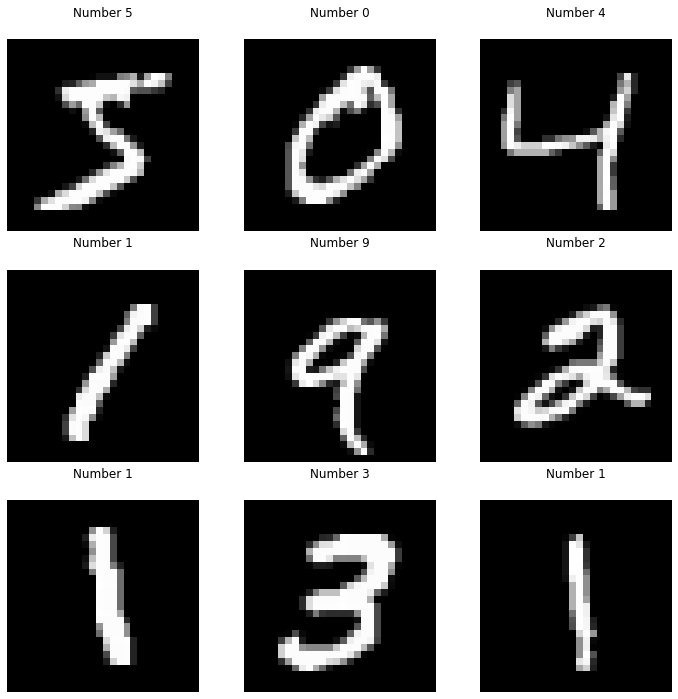

In [8]:
# create figure with 3x3 subplots using matplotlib.pyplot
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))


In [9]:
# convert each image to 1 dimensional array
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

#normalize the data to 0 - 1
X_train = X_train.astype(float)/255.

print(X_train.shape)
print(X_train[0].shape)
print(X_test.shape)
print(X_test[0].shape)

(60000, 784)
(784,)
(10000, 784)
(784,)


### Method I: Random Initialization

In [10]:
distortions = [] 
for i in range(1, 21): 
    kmeans1 = KMeans(n_clusters = i,init = 'random',n_init=10)
    kmeans1.fit(X_train) 
    distortions.append(kmeans1.inertia_)

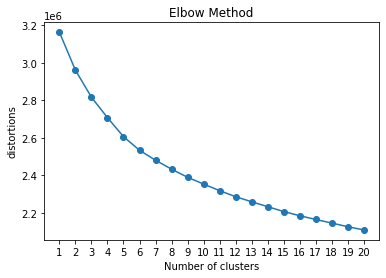

In [11]:
plt.plot(range(1, 21), distortions,marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('distortions') 
plt.xticks(np.arange(1,21))
plt.title("Elbow Method")
plt.show()

I have selected the K(Number of Clusters) value from the above **Elbow Method** plot. 
For each value of K, we are calculating Distortions(Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

Hence, I have chosen K-value as 12 from the above plot.

In [153]:
kmeans1 = KMeans(n_clusters = 12, init = "random")
kmeans1.fit(X_train)
clusters1 = kmeans1.cluster_centers_

In [156]:
clusters1.shape

(12, 784)

In [157]:
c1 = clusters1.reshape(12,28,28)

#### Visualising the Cluster Centroids for K=12

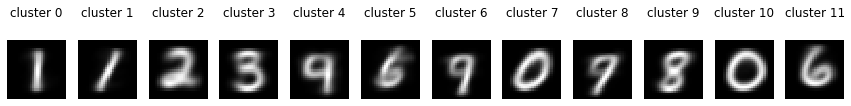

In [158]:
fig, axs = plt.subplots(1,12,figsize = (15,15))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.matshow(c1[i])
    ax.axis('off')
    ax.set_title('cluster {}'.format(i))
    
plt.show()

From the above Images of Cluster centroids, we can see that,The Centroid of the cluster label of 0 can be said as cluster of images of 1(i.e) 1.Similarly, The Centroid of cluster label of 1 can be said as cluster of images of 1 and so on. Also, It can be seen that the Centroids of cluster labels of 4 and 6, both denote the same cluster of images of 9{although, not clear(can even denote 4)}.This is because, A particular number can be written in different styles and orientations.Hence, Increasing the number of clusters helps to assign a separate cluster to each style and orientation.Also,It can be noted that none of the Centroid of the cluster labels denote the cluster of images of 4 and 5 explicitly. 

In [159]:
def cluster_label(labels,y_train):
    
    reference_labels = {}
    for i in range(len(np.unique(labels))):
        index = np.where(labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels

In [160]:
reference_labels = cluster_label(kmeans1.labels_,y_train)

In [161]:
reference_labels

{0: 1, 1: 1, 2: 2, 3: 3, 4: 4, 5: 6, 6: 7, 7: 0, 8: 7, 9: 8, 10: 0, 11: 6}

#### Similarities and differences between the centroids, and how they relate to the labels of the data, if at all

The **kmeans.labels_** only denotes the cluster to which the image belongs to. It doesn’t denote the number displayed in image. Hence we write a separate function to retrieve the necessary information from kmeans.labels_

A cluster label of 0 is a cluster of images of 1, a cluster label of 1 is a cluster of images of 1 and so on. It can be seen that cluster labels of 0 and 1 both denote the cluster of images of 1 and none of the cluster labels denote the cluster of images of 5.(refer to above dictionary of reference_labels)

We can say that the majority of the Centroids of the clusters have aligned well with the labels of the data.This is because, the Cluster label of 0 is a cluster of images of 1 whose centroid is also a cluster of images of 1. Also, other cluster labels like 1,2,3,5,7,9,10,11 have quite well aligned with the centroid of respective particular cluster and the data in that cluster.
Few, cluster labels like 4 and 6, have not quite well aligned with the centroids of their clusters.

#### Variance: Method I

In [213]:
distances1 = []
for i in range(len(kmeans1.labels_)):
    
    current_centroid = clusters1[kmeans1.labels_[i]].reshape(1,-1)
    source = X_train[i].reshape(1,-1)
    
    #calculating the distance of each point from its cluster center 
    dist = distance.cityblock(current_centroid,source)
#     euc_dist = euclidean_distances(source,current_centroid)
    
    distances1.append(dist)

In [214]:
variance1 = np.sum(distances1)

In [215]:
variance1

5286099.439720753

### Method II: K-means++ initialization

In [35]:
distortions_k1 = [] 
for i in range(1,21): 
    k_means = KMeans(n_clusters = i,init = 'k-means++',n_init=10,max_iter=300,random_state = 0)
    k_means.fit(X_train) 
    distortions_k1.append(k_means.inertia_)

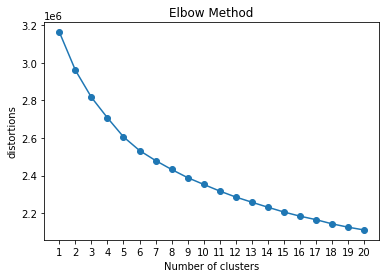

In [36]:
plt.plot(range(1,21), distortions_k1,marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('distortions')
plt.xticks(np.arange(1,21))
plt.title("Elbow Method")
plt.show()

I have selected the K(Number of Clusters) value from the above **Elbow Method** plot.The graph seems similar to Method-1.For each value of K, we are calculating Distortions(Within-Cluster Sum of Square). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

Hence, The K-value I have chosen is **12**

In [176]:
kmeans2 = KMeans(n_clusters = 12, init = 'k-means++')
kmeans2.fit(X_train)
clusters2 = kmeans2.cluster_centers_

In [177]:
clusters2.shape

(12, 784)

In [178]:
c2 = clusters2.reshape(12,28,28)

#### Visualising the Cluster Centroids for K =12

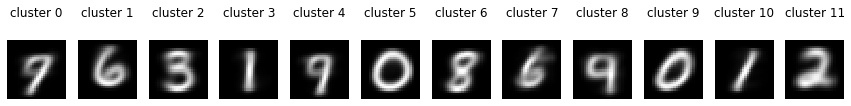

In [179]:
fig, axs = plt.subplots(1,12,figsize = (15,15))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.matshow(c2[i])
    ax.axis('off')
    ax.set_title('cluster {}'.format(i))
    
plt.show()

From the above Images of Cluster centroids, we can see that,The Centroid of the cluster label of 0 can be said as cluster of images of 9.Similarly, The Centroid of cluster label of 1 can be said as cluster of images of 6 and so on. Also, It can be seen that the Centroids of cluster labels of 3 and 10, both denote the same cluster of images of 1.This is because, A particular number can be written in different styles and orientations.Hence, Increasing the number of clusters helps to assign a separate cluster to each style and orientation.Also,It can be noted that none of the Centroid of the cluster labels denote the cluster of images of 4 and 5 explicitly(This is also the case in the method-1)

In [205]:
reference_labels_kplus = cluster_label(kmeans2.labels_,y_train)

In [206]:
reference_labels_kplus

{0: 7, 1: 6, 2: 3, 3: 1, 4: 7, 5: 0, 6: 8, 7: 6, 8: 4, 9: 0, 10: 1, 11: 2}

A cluster label of 0 is a cluster of images of 7, a cluster label of 1 is a cluster of images of 6 and so on. It can be seen that cluster labels of 5 and 9 both denote the cluster of images of 0 and none of the cluster labels denote the cluster of images of 5.(refer to above dictionary of reference_labels_kplus)

We can say that the majority of the Centroids of the clusters have aligned well with the labels of the data.This is because, the Cluster label of 1 is a cluster of images of 6 whose centroid is also cluster of images of 6. Also, few  cluster labels like 0 have not quite well aligned with the centroid of respective particular cluster, this is because, the cluster label of 0 is a cluster of images of 7, but the centroid is a cluster of images of 9.

#### Variance: Method II

In [216]:
distances2 = []
for i in range(len(kmeans2.labels_)):
    
    current_centroid = clusters2[kmeans2.labels_[i]].reshape(1,-1)
    source = X_train[i].reshape(1,-1)
    dist = distance.cityblock(current_centroid,source)
    
#     euc_dist = euclidean_distances(source,current_centroid)
    
    distances2.append(dist)

In [217]:
variance2 = np.sum(distances2)

In [218]:
variance2

5286089.007514456

### Method III: Randomly choosing 1 sample from each of the classes to serve as the initial cluster centers.

In [185]:
#Finding the indices of the uniques values, to initialise the cluster centres
uniqueValues, indicesList = np.unique(y_train, return_index=True)

In [186]:
uniqueValues

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [187]:
indicesList

array([ 1,  3,  5,  7,  2,  0, 13, 15, 17,  4], dtype=int64)

In [188]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [189]:
def centroid_initialise(X_train,indicesList):
    
    centroids = []
    
    for i in indicesList:
        centroids.append(X_train[i])
        
    return centroids

In [190]:
centroids = np.array(centroid_initialise(X_train,indicesList))

In [191]:
centroids.shape

(10, 784)

In [192]:
centroids_initial = centroids.reshape(10,28,28)

#### Initial Cluster Centriods

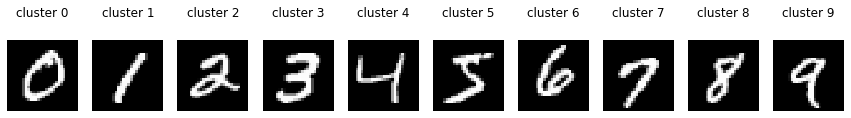

In [193]:
fig, axs = plt.subplots(1,10,figsize = (15,15))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.matshow(centroids_initial[i])
    ax.axis('off')
    ax.set_title('cluster {}'.format(i))

plt.show()

The Above images are of the initial cluster centroids. The Centroid of Cluster 0, is a cluster of images of 0 and so on.

In [194]:
kmeans3 = KMeans(n_clusters = 10, init = centroids)
kmeans3.fit(X_train)
clusters3 = kmeans3.cluster_centers_

C:\Users\shyam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [195]:
clusters3.shape

(10, 784)

In [196]:
c3 = clusters3.reshape(10,28,28)

#### Final Cluster Centroids

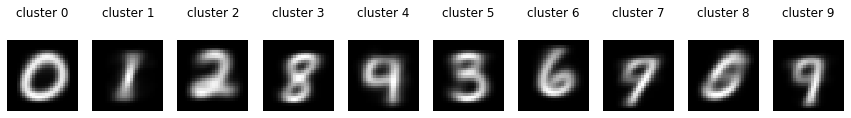

In [197]:
fig, axs = plt.subplots(1,10,figsize = (15,15))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.matshow(c3[i])
    ax.axis('off')
    ax.set_title('cluster {}'.format(i))
    
plt.show()

The above images are of the final cluster centroids.

In [198]:
reference_labels_init = cluster_label(kmeans3.labels_,y_train)

In [199]:
reference_labels_init

{0: 0, 1: 1, 2: 2, 3: 8, 4: 4, 5: 3, 6: 6, 7: 7, 8: 0, 9: 7}

#### Compare and contrast the initial cluster centers to the final cluster centers

We can say that, the initial cluster centres and Final cluster centres do not represent the same labels. 

For eg: We can see that for cluster label of 3, the final centroid of that cluster is the cluster of images of 8, where as the intial centroid is the cluster of images of 3.This is because, may be few of the images representing 3, have been written differently.(i.e, closer to 8).The cluster labels of 0,1,2,4,6,7 represent the same intial and final labels.This is clearly evident from the above images.









#### Comparision of cluster centroids for the above three methods


The K-means++ initialization method, seemed slightly better than the Random initialisation method, this is because the model converged to the global minima in just a few iterations as the initial points may be present inside the respective clusters.

In all the three methods, we can say that majority of the Cluster Centroids represented the labels well.There isn't much difference between the random and K-means++ initialisation, because both of them reperesented the labels almost similarly. But, the cluster centroids in the method -3 haven't represented labels well like the method-1 and method-2. Also, in the three methods, the centroid representing the cluster label of images of 5, hasn't been represented well. This may be because, 5 can be drawn in many ways and also the other images of numbers like 8 and 3 have a high chance of overlapping with the images of 5.This can be resolved by increasing the number of clusters.



#### Variance:Method III

In [200]:
distances3 = []
for i in range(len(kmeans3.labels_)):
    current_centroid = clusters3[kmeans3.labels_[i]].reshape(1,-1)
    source = X_train[i].reshape(1,-1)
    
#     euc_dist = euclidean_distances(source,current_centroid)
    dist = distance.cityblock(current_centroid,source)
    
    distances3.append(dist)

In [201]:
variance3 = np.sum(distances3)

In [202]:
variance3

5437602.153742957

#### Variance for each of the three methods

The Variance, is calculated by using the formula as shown in the class by the Profressor

In [203]:
variance = [variance1,variance2,variance3]
methods = ["Method-1","Method-2","Method-3"]

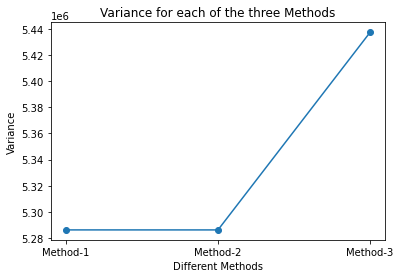

In [212]:
plt.plot(methods,variance,marker = 'o')
plt.xlabel("Different Methods")
plt.ylabel("Variance")
plt.title("Variance for each of the three Methods")
plt.show()

The Variance here is calculated, between the clusters and within the clusters.

- The Variance seems to be almost the same between method-1(Random Initialization) and method-2(K-means++ Initialisation) and then the variance increses in the method 3.Also, this is evident during the comparision of the cluster centroids of the three methods, where the in the method 3, the cluster centroids didn't represent the labels well enough unlike the methods 1 and 2.